# Food Delivery Time Prediction: Case Study


ID: order ID number 
Delivery_person_ID: ID number of the delivery partner
Delivery_person_Age: Age of the delivery partner
Delivery_person_Ratings: ratings of the delivery partner based on past deliveries
Restaurant_latitude: The latitude of the restaurant
Restaurant_longitude: The longitude of the restaurant
Delivery_location_latitude: The latitude of the delivery location
Delivery_location_longitude: The longitude of the delivery location
Type_of_order: The type of meal ordered by the customer
Type_of_vehicle: The type of vehicle delivery partner rides
Time_taken(min): The time taken by the delivery partner to complete the order
You are required to predict the delivery time based on the distance covered by the delivery partner to deliver the order.

In [2]:
# import python lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ti = pd.DataFrame(pd.read_csv(r"I:\MLpratice\Delivery time\deliverytime.txt",sep=','))

In [4]:
ti.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [5]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [6]:
ti.shape

(45593, 11)

In [7]:
ti.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [8]:
ti.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
Delivery_person_Age,1.000000,-0.067449,-0.001955,-0.006796,0.002359,-0.000593,0.292708
Delivery_person_Ratings,-0.067449,1.000000,-0.004846,-0.011147,-0.010198,-0.013350,-0.331103
Restaurant_latitude,-0.001955,-0.004846,1.000000,0.661784,0.866378,0.602713,0.013981
Restaurant_longitude,-0.006796,-0.011147,0.661784,1.000000,0.632293,0.915026,0.007821
Delivery_location_latitude,0.002359,-0.010198,0.866378,0.632293,1.000000,0.690515,0.014243
Delivery_location_longitude,-0.000593,-0.013350,0.602713,0.915026,0.690515,1.000000,0.007625
Time_taken(min),0.292708,-0.331103,0.013981,0.007821,0.014243,0.007625,1.000000


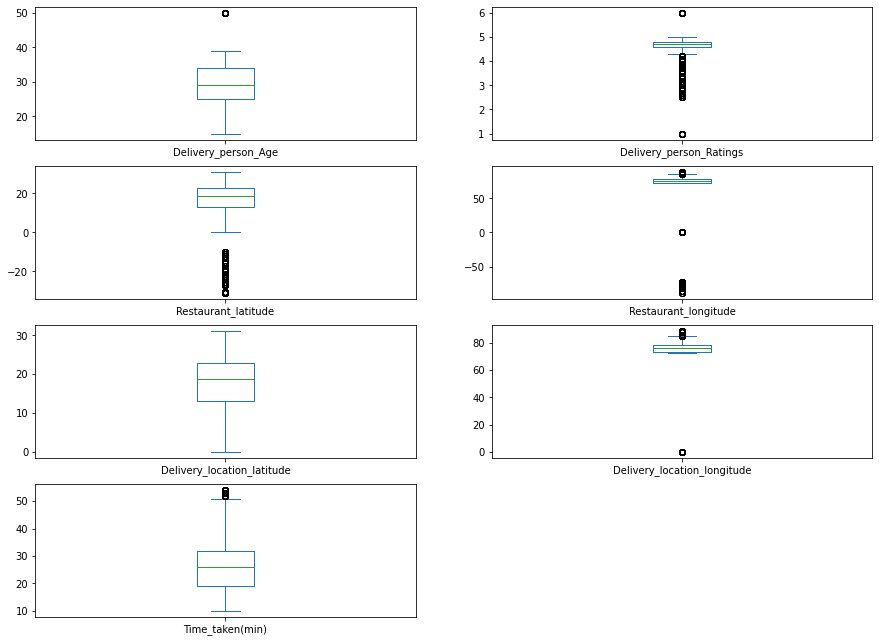

In [9]:
ti.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));


<Figure size 1080x1440 with 0 Axes>

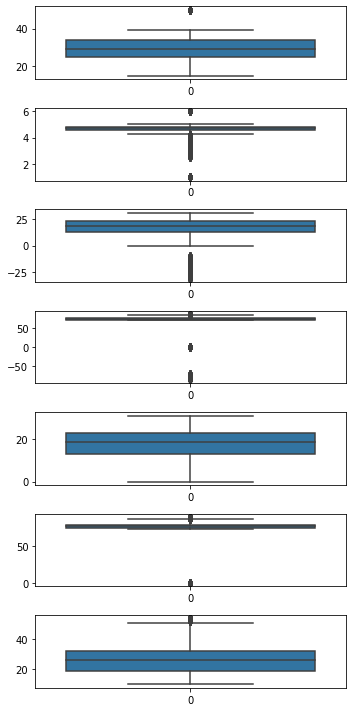

In [10]:
#Dealing with outliers using the Using Box Plot method

plt.figure(figsize=(15,20))
fig, axs = plt.subplots(7,figsize = (5,10))
plt1 = sns.boxplot(ti['Delivery_person_Age'],ax = axs[0])
plt2 = sns.boxplot(ti['Delivery_person_Ratings'],ax= axs[1])
plt2 = sns.boxplot(ti['Restaurant_latitude'],ax= axs[2])





plt2 = sns.boxplot(ti['Restaurant_longitude'],ax= axs[3])
plt2 = sns.boxplot(ti['Delivery_location_latitude'],ax= axs[4])
plt2 = sns.boxplot(ti['Delivery_location_longitude'],ax= axs[5])
plt2 = sns.boxplot(ti['Time_taken(min)'],ax= axs[6])

plt.tight_layout()

In [11]:
#Detect and Remove the Outliers using Python

# Z score

from scipy import stats
import numpy as np

s = np.abs(stats.zscore(ti['Delivery_person_Age']))

print(s)

0        1.308808
1        0.782190
2        1.148742
3        1.484347
4        0.431111
           ...   
45588    0.080033
45589    1.499821
45590    0.080033
45591    1.675360
45592    1.148742
Name: Delivery_person_Age, Length: 45593, dtype: float64


In [12]:
ti.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


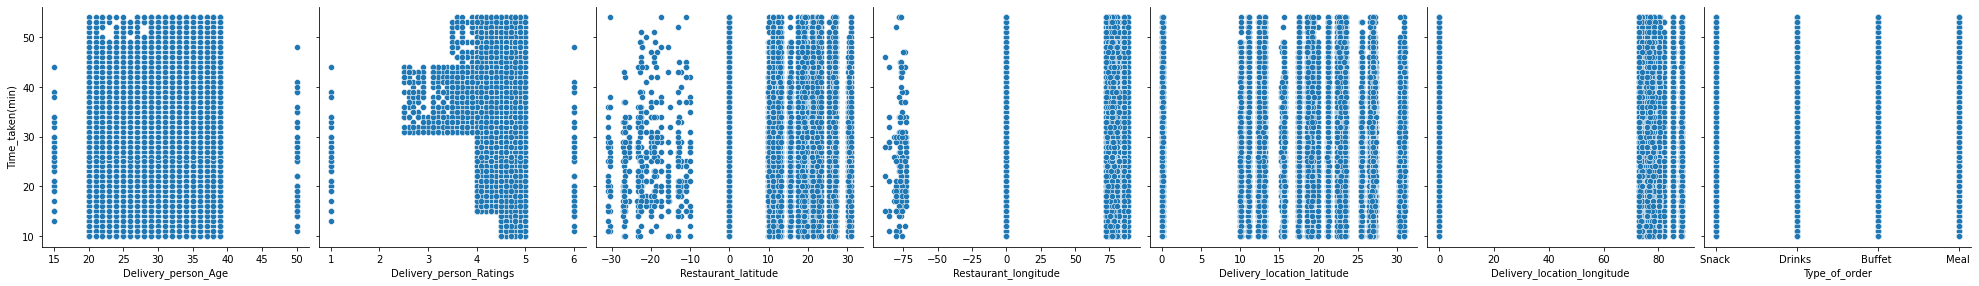

In [13]:
#Detect and Remove the Outliers using Using ScatterPlot.

sns.pairplot(ti, x_vars=['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Type_of_order'],y_vars='Time_taken(min)', height=4, aspect=1, kind='scatter')
plt.show()


In [14]:
# cheaking for the co-relation/multicolinearity
# Let's see the correlation between different variables.
ti.corr()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
Delivery_person_Age,1.000000,-0.067449,-0.001955,-0.006796,0.002359,-0.000593,0.292708
Delivery_person_Ratings,-0.067449,1.000000,-0.004846,-0.011147,-0.010198,-0.013350,-0.331103
Restaurant_latitude,-0.001955,-0.004846,1.000000,0.661784,0.866378,0.602713,0.013981
Restaurant_longitude,-0.006796,-0.011147,0.661784,1.000000,0.632293,0.915026,0.007821
Delivery_location_latitude,0.002359,-0.010198,0.866378,0.632293,1.000000,0.690515,0.014243
Delivery_location_longitude,-0.000593,-0.013350,0.602713,0.915026,0.690515,1.000000,0.007625
Time_taken(min),0.292708,-0.331103,0.013981,0.007821,0.014243,0.007625,1.000000


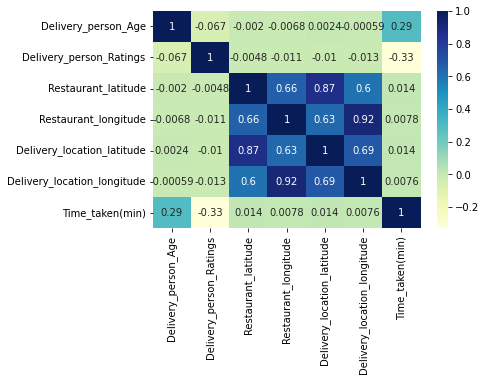

In [15]:
# using heatmap
sns.heatmap(ti.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [23]:
ti.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


encoder = LabelEncoder()

ti['Delivery_person_ID']= encoder.fit_transform(ti['Delivery_person_ID'])
ti['Type_of_order']= encoder.fit_transform(ti['Type_of_order'])
ti['Type_of_vehicle']= encoder.fit_transform(ti['Type_of_vehicle'])

In [25]:
ti.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,637,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,24
1,B379,232,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,33
2,5D6D,234,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,26
3,7A6A,397,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,21
4,70A2,333,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,30


In [42]:

ti['Delivery_location_longitudet'] = pd.to_numeric(ti['Delivery_location_longitude'], errors='coerce')
print(ti.dtypes)

ID                               object
Delivery_person_ID                int32
Delivery_person_Age               int64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Type_of_order                     int32
Type_of_vehicle                   int32
Time_taken(min)                   int64
Delivery_location_longitudet    float64
dtype: object


In [43]:
ti['Delivery_person_Ratings'] = pd.to_numeric(ti['Delivery_person_Ratings'], errors='coerce')
print(ti.dtypes)

ID                               object
Delivery_person_ID                int32
Delivery_person_Age               int64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Type_of_order                     int32
Type_of_vehicle                   int32
Time_taken(min)                   int64
Delivery_location_longitudet    float64
dtype: object


In [44]:
ti['Restaurant_latitude'] = pd.to_numeric(ti['Restaurant_latitude'], errors='coerce')
print(ti.dtypes)

ID                               object
Delivery_person_ID                int32
Delivery_person_Age               int64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Type_of_order                     int32
Type_of_vehicle                   int32
Time_taken(min)                   int64
Delivery_location_longitudet    float64
dtype: object


In [46]:
ti['Restaurant_longitude'] = pd.to_numeric(ti['Restaurant_longitude'], errors='coerce')
print(ti.dtypes)

ID                               object
Delivery_person_ID                int32
Delivery_person_Age               int64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Type_of_order                     int32
Type_of_vehicle                   int32
Time_taken(min)                   int64
Delivery_location_longitudet    float64
dtype: object


In [47]:
ti['Delivery_location_longitude'] = pd.to_numeric(ti['Delivery_location_longitude'], errors='coerce')
print(ti.dtypes)

ID                               object
Delivery_person_ID                int32
Delivery_person_Age               int64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Type_of_order                     int32
Type_of_vehicle                   int32
Time_taken(min)                   int64
Delivery_location_longitudet    float64
dtype: object


Food Delivery Time Prediction Model


Now let’s train a Machine Learning model using an LSTM neural network model for the task of food delivery time prediction:

In [53]:
x=ti.drop(columns=['Time_taken(min)','ID'],axis=1)
y=ti['Time_taken(min)']


In [54]:
x

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Delivery_location_longitudet
0,637,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,75.912471
1,232,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,77.813237
2,234,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,77.688400
3,397,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,77.026494
4,333,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,80.289982
...,...,...,...,...,...,...,...,...,...,...
45588,672,30,4.8,26.902328,75.794257,26.912328,75.804257,2,2,75.804257
45589,45,21,4.6,0.000000,0.000000,0.070000,0.070000,0,2,0.070000
45590,326,30,4.9,13.022394,80.242439,13.052394,80.272439,1,3,80.272439
45591,390,20,4.7,11.001753,76.986241,11.041753,77.026241,3,2,77.026241


In [28]:
y

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [55]:
x.shape,y.shape

((45593, 10), (45593,))

In [56]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [57]:
X_train.shape, y_train.shape,x_test.shape, y_test.shape

((36474, 10), (36474,), (9119, 10), (9119,))

In [59]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
LR=classifier.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
score = LR.score(x_test, y_test)
print("est Accuracy Score", score)

est Accuracy Score 0.049237855027963594


In [61]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 0.9970740107414761
R squared: 0.9970740107414761


In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9000209367077466
R squared: 0.9000209367077466
